In [1]:
import pandas as pd
import numpy as np
import warnings as wr
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

wr.filterwarnings("ignore")
loc_lbl = r"D:\Documentos\Facu\Organizacion de Datos\TP2\Labels"
loc_ftr = r"D:\Documentos\Facu\Organizacion de Datos\TP2\Features\ftr_ins"

In [2]:
ins_lb = pd.read_csv( loc_lbl + "\\ins_lb.csv", dtype = {"obs_18_20":"bool", "obs_21_23":"bool", "obs_24_26":"bool"} )

### Filtro de manera que tenga los datos necesarios

In [3]:
rh_18_20 = pd.read_csv( "D:\Documentos\Facu\Organizacion de Datos\TP2\Training Sets\ins_18_20.csv" ); rh_18_20 = rh_18_20["ref_hash"].drop_duplicates().tolist()
rh_21_23 = pd.read_csv( "D:\Documentos\Facu\Organizacion de Datos\TP2\Training Sets\ins_21_23.csv" ); rh_21_23 = rh_21_23["ref_hash"].drop_duplicates().tolist()

In [4]:
set_trn = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_18_20 ), ["ref_hash", "21_23_sc"] ]
set_tst = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_21_23 ), ["ref_hash", "24_26_sc"] ]

t_lim = 259200; max_t = 400
set_trn_loc = pd.concat( [ set_trn.loc[ set_trn["21_23_sc"] < t_lim ], set_trn.loc[ set_trn["21_23_sc"] == t_lim ].reset_index( drop = True ).loc[: max_t] ], axis = 0 ).sample(frac=1).reset_index(drop=True)
set_tst_loc = pd.concat( [ set_tst.loc[ set_tst["24_26_sc"] < t_lim ], set_tst.loc[ set_tst["24_26_sc"] == t_lim ].reset_index( drop = True ).loc[: max_t] ], axis = 0 ).sample(frac=1).reset_index(drop=True)

### Creamos los Train/Test

In [5]:
Z = set_tst[ ["ref_hash"] ] #Datos test
W = set_tst[ ["ref_hash","24_26_sc"] ] #Label test

X = set_trn[ ["ref_hash"] ] #Datos train
Y = set_trn[ ["ref_hash","21_23_sc"] ] #Label train

Z_loc = set_tst_loc[ ["ref_hash"] ] #Datos test reducido
W_loc = set_tst_loc[ ["ref_hash","24_26_sc"] ] #Label test reducido

X_loc = set_trn_loc[ ["ref_hash"] ] #Datos train reducido
Y_loc = set_trn_loc[ ["ref_hash","21_23_sc"] ] #Label train reducido

# <span style="color:orange">  Preparo los datos para predecir </span>
Con los datos 21-23 predecimos "24-26_sc"

In [6]:
Z_var = Z_loc
W_var = W_loc

### Agregamos los features 

In [7]:
ftr_01_Z = pd.read_csv( loc_ftr + "\\sin_hour_21_23.csv" )  ; Z_var = Z_var.merge( ftr_01_Z, how = "inner", on = "ref_hash" )
ftr_02_z = pd.read_csv( loc_ftr + "\\sin_wday_21_23.csv")   ; Z_var = Z_var.merge(  ftr_02_z, how = "inner", on = "ref_hash")
ftr_03_z = pd.read_csv( loc_ftr + "\\cant_imp_21_23.csv")   ; Z_var = Z_var.merge(  ftr_03_z, how = "inner", on = "ref_hash")
ftr_04_z = pd.read_csv( loc_ftr + "\\cant_app_ins_21_23.csv") ; Z_var = Z_var.merge(  ftr_04_z, how = "inner", on = "ref_hash")
ftr_05_z = pd.read_csv( loc_ftr + "\\app_id_21_23.csv")     ; Z_var = Z_var.merge(  ftr_05_z, how = "inner", on = "ref_hash")
ftr_06_z = pd.read_csv( loc_ftr + "\\sin_hour_21_23.csv")   ; Z_var = Z_var.merge(  ftr_06_z, how = "inner", on = "ref_hash")
ftr_07_z = pd.read_csv( loc_ftr + "\\hr_f_evt_21_23.csv")   ; Z_var = Z_var.merge(  ftr_07_z, how = "inner", on = "ref_hash")
ftr_08_z = pd.read_csv( loc_ftr + "\\main_ihr_21_23.csv")   ; Z_var = Z_var.merge(  ftr_08_z, how = "inner", on = "ref_hash")
ftr_09_z = pd.read_csv( loc_ftr + "\\main_ahr_21_23.csv")   ; Z_var = Z_var.merge(  ftr_09_z, how = "inner", on = "ref_hash")
ftr_10_z = pd.read_csv( loc_ftr + "\\hr_f_auc_21_23.csv")   ; Z_var = Z_var.merge(  ftr_10_z, how = "inner", on = "ref_hash")
ftr_11_z = pd.read_csv( loc_ftr + "\\cant_ins_21_23.csv")   ; Z_var = Z_var.merge(  ftr_11_z, how = "inner", on = "ref_hash")
ftr_12_z = pd.read_csv( loc_ftr + "\\cant_evt_21_23.csv")   ; Z_var = Z_var.merge(  ftr_12_z, how = "inner", on = "ref_hash")
ftr_13_z = pd.read_csv( loc_ftr + "\\cant_auc_21_23.csv")   ; Z_var = Z_var.merge(  ftr_13_z, how = "inner", on = "ref_hash")
ftr_14_z = pd.read_csv( loc_ftr + "\\ip_encod_21_23.csv")   ; Z_var = Z_var.merge(  ftr_14_z, how = "inner", on = "ref_hash")
ftr_15_z = pd.read_csv( loc_ftr + "\\wifi_ins_21_23.csv")   ; Z_var = Z_var.merge(  ftr_15_z, how = "inner", on = "ref_hash")
ftr_16_z = pd.read_csv( loc_ftr + "\\main_app_21_23.csv")   ; Z_var = Z_var.merge(  ftr_16_z, how = "inner", on = "ref_hash")
ftr_17_z = pd.read_csv( loc_ftr + "\\cins_imp_21_23.csv")   ; Z_var = Z_var.merge(  ftr_17_z, how = "inner", on = "ref_hash")
ftr_18_z = pd.read_csv( loc_ftr + "\\type_ins_21_23.csv")   ; Z_var = Z_var.merge(  ftr_18_z, how = "inner", on = "ref_hash")
ftr_19_z = pd.read_csv( loc_ftr + "\\ref_type_21_23.csv")   ; Z_var = Z_var.merge(  ftr_19_z, how = "inner", on = "ref_hash")
ftr_20_z = pd.read_csv( loc_ftr + "\\cins_atr_21_23.csv")   ; Z_var = Z_var.merge(  ftr_20_z, how = "inner", on = "ref_hash")
ftr_21_z = pd.read_csv( loc_ftr + "\\frst_auc_21_23.csv")   ; Z_var = Z_var.merge(  ftr_21_z, how = "inner", on = "ref_hash")
ftr_22_z = pd.read_csv( loc_ftr + "\\frst_evt_21_23.csv")   ; Z_var = Z_var.merge(  ftr_22_z, how = "inner", on = "ref_hash")
ftr_23_z = pd.read_csv( loc_ftr + "\\frst_evt_21_23.csv")   ; Z_var = Z_var.merge(  ftr_23_z, how = "inner", on = "ref_hash")
ftr_24_z = pd.read_csv( loc_ftr + "\\cant_clk_21_23.csv")   ; Z_var = Z_var.merge(  ftr_24_z, how = "inner", on = "ref_hash")
ftr_25_z = pd.read_csv( loc_ftr + "\\dev_lang_21_23.csv")   ; Z_var = Z_var.merge(  ftr_25_z, how = "inner", on = "ref_hash")
ftr_26_z = pd.read_csv( loc_ftr + "\\dev_modl_21_23.csv")   ; Z_var = Z_var.merge(  ftr_26_z, how = "inner", on = "ref_hash")
ftr_27_z = pd.read_csv( loc_ftr + "\\ins_dsua_21_23.csv")   ; Z_var = Z_var.merge(  ftr_27_z, how = "inner", on = "ref_hash")
ftr_28_z = pd.read_csv( loc_ftr + "\\srce_auc_21_23.csv")   ; Z_var = Z_var.merge(  ftr_28_z, how = "inner", on = "ref_hash")
ftr_29_z = pd.read_csv( loc_ftr + "\\rh_encod_21_23.csv")   ; Z_var = Z_var.merge(  ftr_29_z, how = "inner", on = "ref_hash")
ftr_30_z = pd.read_csv( loc_ftr + "\\atbt_ins_21_23.csv")   ; Z_var = Z_var.merge(  ftr_30_z, how = "inner", on = "ref_hash")
ftr_31_z = pd.read_csv( loc_ftr + "\\kind_evt_21_23.csv")   ; Z_var = Z_var.merge(  ftr_31_z, how = "inner", on = "ref_hash")
ftr_32_z = pd.read_csv( loc_ftr + "\\cevt_atr_21_23.csv")   ; Z_var = Z_var.merge(  ftr_32_z, how = "inner", on = "ref_hash")
ftr_33_z = pd.read_csv( loc_ftr + "\\mapp_evt_21_23.csv")   ; Z_var = Z_var.merge(  ftr_33_z, how = "inner", on = "ref_hash")
ftr_34_z = pd.read_csv( loc_ftr + "\\wifi_evt_21_23.csv")   ; Z_var = Z_var.merge(  ftr_34_z, how = "inner", on = "ref_hash")
ftr_35_z = pd.read_csv( loc_ftr + "\\frst_ins_21_23.csv")   ; Z_var = Z_var.merge(  ftr_35_z, how = "inner", on = "ref_hash")
ftr_36_z = pd.read_csv( loc_ftr + "\\frst_clk_21_23.csv")   ; Z_var = Z_var.merge(  ftr_36_z, how = "inner", on = "ref_hash")
ftr_37_z = pd.read_csv( loc_ftr + "\\last_ins_21_23.csv")   ; Z_var = Z_var.merge(  ftr_37_z, how = "inner", on = "ref_hash")
ftr_38_z = pd.read_csv( loc_ftr + "\\last_auc_21_23.csv")   ; Z_var = Z_var.merge(  ftr_38_z, how = "inner", on = "ref_hash")
ftr_39_z = pd.read_csv( loc_ftr + "\\last_evt_21_23.csv")   ; Z_var = Z_var.merge(  ftr_39_z, how = "inner", on = "ref_hash")
ftr_40_z = pd.read_csv( loc_ftr + "\\last_clk_21_23.csv")   ; Z_var = Z_var.merge(  ftr_40_z, how = "inner", on = "ref_hash")
ftr_41_z = pd.read_csv( loc_ftr + "\\mt_1_ins_21_23.csv")   ; Z_var = Z_var.merge(  ftr_41_z, how = "inner", on = "ref_hash")
ftr_42_z = pd.read_csv( loc_ftr + "\\ins_night_21_23.csv")  ; Z_var = Z_var.merge(  ftr_42_z, how = "inner", on = "ref_hash")
ftr_43_z = pd.read_csv( loc_ftr + "\\ins_morn_21_23.csv")   ; Z_var = Z_var.merge(  ftr_43_z, how = "inner", on = "ref_hash")
ftr_44_z = pd.read_csv( loc_ftr + "\\ins_midday_21_23.csv") ; Z_var = Z_var.merge(  ftr_44_z, how = "inner", on = "ref_hash")
ftr_45_z = pd.read_csv( loc_ftr + "\\ins_after_21_23.csv")  ; Z_var = Z_var.merge(  ftr_45_z, how = "inner", on = "ref_hash")
ftr_46_z = pd.read_csv( loc_ftr + "\\auc_night_21_23.csv")  ; Z_var = Z_var.merge(  ftr_46_z, how = "inner", on = "ref_hash")
ftr_47_z = pd.read_csv( loc_ftr + "\\auc_morn_21_23.csv")   ; Z_var = Z_var.merge(  ftr_47_z, how = "inner", on = "ref_hash")
ftr_48_z = pd.read_csv( loc_ftr + "\\auc_midday_21_23.csv") ; Z_var = Z_var.merge(  ftr_48_z, how = "inner", on = "ref_hash")
ftr_49_z = pd.read_csv( loc_ftr + "\\auc_after_21_23.csv")  ; Z_var = Z_var.merge(  ftr_49_z, how = "inner", on = "ref_hash")
ftr_50_z = pd.read_csv( loc_ftr + "\\evt_night_21_23.csv")  ; Z_var = Z_var.merge(  ftr_50_z, how = "inner", on = "ref_hash")
ftr_51_z = pd.read_csv( loc_ftr + "\\evt_morn_21_23.csv")   ; Z_var = Z_var.merge(  ftr_51_z, how = "inner", on = "ref_hash")
ftr_52_z = pd.read_csv( loc_ftr + "\\evt_midday_21_23.csv") ; Z_var = Z_var.merge(  ftr_52_z, how = "inner", on = "ref_hash")
ftr_53_z = pd.read_csv( loc_ftr + "\\evt_after_21_23.csv")  ; Z_var = Z_var.merge(  ftr_53_z, how = "inner", on = "ref_hash")
ftr_54_z = pd.read_csv( loc_ftr + "\\auc_night_21_23.csv")  ; Z_var = Z_var.merge(  ftr_54_z, how = "inner", on = "ref_hash")
ftr_55_z = pd.read_csv( loc_ftr + "\\auc_morn_21_23.csv")   ; Z_var = Z_var.merge(  ftr_55_z, how = "inner", on = "ref_hash")
ftr_56_z = pd.read_csv( loc_ftr + "\\auc_midday_21_23.csv") ; Z_var = Z_var.merge(  ftr_56_z, how = "inner", on = "ref_hash")
ftr_57_z = pd.read_csv( loc_ftr + "\\auc_after_21_23.csv")  ; Z_var = Z_var.merge(  ftr_57_z, how = "inner", on = "ref_hash")

In [8]:
#ftr_46_Z = pd.read_csv( loc_ftr + "\\auc_ngoh_21_23.csv" ); Z_var = Z_var.merge( ftr_46_Z, how = "inner", on = "ref_hash" )
#ftr_47_Z = pd.read_csv( loc_ftr + "\\auc_mroh_21_23.csv" ); Z_var = Z_var.merge( ftr_47_Z, how = "inner", on = "ref_hash" )
#ftr_48_Z = pd.read_csv( loc_ftr + "\\auc_afoh_21_23.csv" ); Z_var = Z_var.merge( ftr_48_Z, how = "inner", on = "ref_hash" )
#ftr_49_Z = pd.read_csv( loc_ftr + "\\auc_mdoh_21_23.csv" ); Z_var = Z_var.merge( ftr_49_Z, how = "inner", on = "ref_hash" )
#ftr_50_Z = pd.read_csv( loc_ftr + "\\clk_ngoh_21_23.csv" ); Z_var = Z_var.merge( ftr_50_Z, how = "inner", on = "ref_hash" )
#ftr_51_Z = pd.read_csv( loc_ftr + "\\clk_mroh_21_23.csv" ); Z_var = Z_var.merge( ftr_51_Z, how = "inner", on = "ref_hash" )
#ftr_52_Z = pd.read_csv( loc_ftr + "\\clk_afoh_21_23.csv" ); Z_var = Z_var.merge( ftr_52_Z, how = "inner", on = "ref_hash" )
#ftr_53_Z = pd.read_csv( loc_ftr + "\\clk_mdoh_21_23.csv" ); Z_var = Z_var.merge( ftr_53_Z, how = "inner", on = "ref_hash" )
#ftr_54_Z = pd.read_csv( loc_ftr + "\\evt_ngoh_21_23.csv" ); Z_var = Z_var.merge( ftr_54_Z, how = "inner", on = "ref_hash" )
#ftr_55_Z = pd.read_csv( loc_ftr + "\\evt_mroh_21_23.csv" ); Z_var = Z_var.merge( ftr_55_Z, how = "inner", on = "ref_hash" )
#ftr_56_Z = pd.read_csv( loc_ftr + "\\evt_afoh_21_23.csv" ); Z_var = Z_var.merge( ftr_56_Z, how = "inner", on = "ref_hash" )
#ftr_57_Z = pd.read_csv( loc_ftr + "\\evt_mdoh_21_23.csv" ); Z_var = Z_var.merge( ftr_57_Z, how = "inner", on = "ref_hash" )

# <span style="color:orange">  Preparo los datos para entrenar </span>

Con los datos 18-20 + "21-23_sc" entrenamos

In [9]:
Y_var = Y_loc
X_var = X_loc

### Agregamos los features

In [10]:
ftr_01_x = pd.read_csv( loc_ftr + "\\sin_hour_18_20.csv") ; X_var = X_var.merge( ftr_01_x, how = "inner", on = "ref_hash" )
ftr_02_x = pd.read_csv( loc_ftr + "\\sin_wday_18_20.csv")  ; X_var = X_var.merge(  ftr_02_x, how = "inner", on = "ref_hash")
ftr_03_x = pd.read_csv( loc_ftr + "\\cant_imp_18_20.csv")  ; X_var = X_var.merge(  ftr_03_x, how = "inner", on = "ref_hash")
ftr_04_x = pd.read_csv( loc_ftr + "\\cant_app_ins_18_20.csv") ; X_var = X_var.merge(  ftr_04_x, how = "inner", on = "ref_hash")
ftr_05_x = pd.read_csv( loc_ftr + "\\app_id_18_20.csv")    ; X_var = X_var.merge(  ftr_05_x, how = "inner", on = "ref_hash")
ftr_06_x = pd.read_csv( loc_ftr + "\\sin_hour_18_20.csv")  ; X_var = X_var.merge(  ftr_06_x, how = "inner", on = "ref_hash")
ftr_07_x = pd.read_csv( loc_ftr + "\\hr_f_evt_18_20.csv")  ; X_var = X_var.merge(  ftr_07_x, how = "inner", on = "ref_hash")
ftr_08_x = pd.read_csv( loc_ftr + "\\main_ihr_18_20.csv")  ; X_var = X_var.merge(  ftr_08_x, how = "inner", on = "ref_hash")
ftr_09_x = pd.read_csv( loc_ftr + "\\main_ahr_18_20.csv")  ; X_var = X_var.merge(  ftr_09_x, how = "inner", on = "ref_hash")
ftr_10_x = pd.read_csv( loc_ftr + "\\hr_f_auc_18_20.csv")  ; X_var = X_var.merge(  ftr_10_x, how = "inner", on = "ref_hash")
ftr_11_x = pd.read_csv( loc_ftr + "\\cant_ins_18_20.csv")  ; X_var = X_var.merge(  ftr_11_x, how = "inner", on = "ref_hash")
ftr_12_x = pd.read_csv( loc_ftr + "\\cant_evt_18_20.csv")  ; X_var = X_var.merge(  ftr_12_x, how = "inner", on = "ref_hash")
ftr_13_x = pd.read_csv( loc_ftr + "\\cant_auc_18_20.csv")  ; X_var = X_var.merge(  ftr_13_x, how = "inner", on = "ref_hash")
ftr_14_x = pd.read_csv( loc_ftr + "\\ip_encod_18_20.csv")  ; X_var = X_var.merge(  ftr_14_x, how = "inner", on = "ref_hash")
ftr_15_x = pd.read_csv( loc_ftr + "\\wifi_ins_18_20.csv")  ; X_var = X_var.merge(  ftr_15_x, how = "inner", on = "ref_hash")
ftr_16_x = pd.read_csv( loc_ftr + "\\main_app_18_20.csv")  ; X_var = X_var.merge(  ftr_16_x, how = "inner", on = "ref_hash")
ftr_17_x = pd.read_csv( loc_ftr + "\\cins_imp_18_20.csv")  ; X_var = X_var.merge(  ftr_17_x, how = "inner", on = "ref_hash")
ftr_18_x = pd.read_csv( loc_ftr + "\\type_ins_18_20.csv")  ; X_var = X_var.merge(  ftr_18_x, how = "inner", on = "ref_hash")
ftr_19_x = pd.read_csv( loc_ftr + "\\ref_type_18_20.csv")  ; X_var = X_var.merge(  ftr_19_x, how = "inner", on = "ref_hash")
ftr_20_x = pd.read_csv( loc_ftr + "\\cins_atr_18_20.csv")  ; X_var = X_var.merge(  ftr_20_x, how = "inner", on = "ref_hash")
ftr_21_x = pd.read_csv( loc_ftr + "\\frst_auc_18_20.csv")  ; X_var = X_var.merge(  ftr_21_x, how = "inner", on = "ref_hash")
ftr_22_x = pd.read_csv( loc_ftr + "\\frst_evt_18_20.csv")  ; X_var = X_var.merge(  ftr_22_x, how = "inner", on = "ref_hash")
ftr_23_x = pd.read_csv( loc_ftr + "\\frst_evt_18_20.csv")  ; X_var = X_var.merge(  ftr_23_x, how = "inner", on = "ref_hash")
ftr_24_x = pd.read_csv( loc_ftr + "\\cant_clk_18_20.csv")  ; X_var = X_var.merge(  ftr_24_x, how = "inner", on = "ref_hash")
ftr_25_x = pd.read_csv( loc_ftr + "\\dev_lang_18_20.csv")  ; X_var = X_var.merge(  ftr_25_x, how = "inner", on = "ref_hash")
ftr_26_x = pd.read_csv( loc_ftr + "\\dev_modl_18_20.csv")  ; X_var = X_var.merge(  ftr_26_x, how = "inner", on = "ref_hash")
ftr_27_x = pd.read_csv( loc_ftr + "\\ins_dsua_18_20.csv")  ; X_var = X_var.merge(  ftr_27_x, how = "inner", on = "ref_hash")
ftr_28_x = pd.read_csv( loc_ftr + "\\srce_auc_18_20.csv")  ; X_var = X_var.merge(  ftr_28_x, how = "inner", on = "ref_hash")
ftr_29_x = pd.read_csv( loc_ftr + "\\rh_encod_18_20.csv")  ; X_var = X_var.merge(  ftr_29_x, how = "inner", on = "ref_hash")
ftr_30_x = pd.read_csv( loc_ftr + "\\atbt_ins_18_20.csv")  ; X_var = X_var.merge(  ftr_30_x, how = "inner", on = "ref_hash")
ftr_31_x = pd.read_csv( loc_ftr + "\\kind_evt_18_20.csv")  ; X_var = X_var.merge(  ftr_31_x, how = "inner", on = "ref_hash")
ftr_32_x = pd.read_csv( loc_ftr + "\\cevt_atr_18_20.csv")  ; X_var = X_var.merge(  ftr_32_x, how = "inner", on = "ref_hash")
ftr_33_x = pd.read_csv( loc_ftr + "\\mapp_evt_18_20.csv")  ; X_var = X_var.merge(  ftr_33_x, how = "inner", on = "ref_hash")
ftr_34_x = pd.read_csv( loc_ftr + "\\wifi_evt_18_20.csv")  ; X_var = X_var.merge(  ftr_34_x, how = "inner", on = "ref_hash")
ftr_35_x = pd.read_csv( loc_ftr + "\\frst_ins_18_20.csv")  ; X_var = X_var.merge(  ftr_35_x, how = "inner", on = "ref_hash")
ftr_36_x = pd.read_csv( loc_ftr + "\\frst_clk_18_20.csv")  ; X_var = X_var.merge(  ftr_36_x, how = "inner", on = "ref_hash")
ftr_37_x = pd.read_csv( loc_ftr + "\\last_ins_18_20.csv")  ; X_var = X_var.merge(  ftr_37_x, how = "inner", on = "ref_hash")
ftr_38_x = pd.read_csv( loc_ftr + "\\last_auc_18_20.csv")  ; X_var = X_var.merge(  ftr_38_x, how = "inner", on = "ref_hash")
ftr_39_x = pd.read_csv( loc_ftr + "\\last_evt_18_20.csv")  ; X_var = X_var.merge(  ftr_39_x, how = "inner", on = "ref_hash")
ftr_40_x = pd.read_csv( loc_ftr + "\\last_clk_18_20.csv")  ; X_var = X_var.merge(  ftr_40_x, how = "inner", on = "ref_hash")
ftr_41_x = pd.read_csv( loc_ftr + "\\mt_1_ins_18_20.csv")  ; X_var = X_var.merge(  ftr_41_x, how = "inner", on = "ref_hash")
ftr_42_x = pd.read_csv( loc_ftr + "\\ins_night_18_20.csv") ; X_var = X_var.merge(  ftr_42_x, how = "inner", on = "ref_hash")
ftr_43_x = pd.read_csv( loc_ftr + "\\ins_morn_18_20.csv")  ; X_var = X_var.merge(  ftr_43_x, how = "inner", on = "ref_hash")
ftr_44_x = pd.read_csv( loc_ftr + "\\ins_midday_18_20.csv") ; X_var = X_var.merge(  ftr_44_x, how = "inner", on = "ref_hash")
ftr_45_x = pd.read_csv( loc_ftr + "\\ins_after_18_20.csv") ; X_var = X_var.merge(  ftr_45_x, how = "inner", on = "ref_hash")
ftr_46_x = pd.read_csv( loc_ftr + "\\auc_night_18_20.csv") ; X_var = X_var.merge(  ftr_46_x, how = "inner", on = "ref_hash")
ftr_47_x = pd.read_csv( loc_ftr + "\\auc_morn_18_20.csv")  ; X_var = X_var.merge(  ftr_47_x, how = "inner", on = "ref_hash")
ftr_48_x = pd.read_csv( loc_ftr + "\\auc_midday_18_20.csv") ; X_var = X_var.merge(  ftr_48_x, how = "inner", on = "ref_hash")
ftr_49_x = pd.read_csv( loc_ftr + "\\auc_after_18_20.csv") ; X_var = X_var.merge(  ftr_49_x, how = "inner", on = "ref_hash")
ftr_50_x = pd.read_csv( loc_ftr + "\\evt_night_18_20.csv") ; X_var = X_var.merge(  ftr_50_x, how = "inner", on = "ref_hash")
ftr_51_x = pd.read_csv( loc_ftr + "\\evt_morn_18_20.csv")  ; X_var = X_var.merge(  ftr_51_x, how = "inner", on = "ref_hash")
ftr_52_x = pd.read_csv( loc_ftr + "\\evt_midday_18_20.csv") ; X_var = X_var.merge(  ftr_52_x, how = "inner", on = "ref_hash")
ftr_53_x = pd.read_csv( loc_ftr + "\\evt_after_18_20.csv") ; X_var = X_var.merge(  ftr_53_x, how = "inner", on = "ref_hash")
ftr_54_x = pd.read_csv( loc_ftr + "\\auc_night_18_20.csv") ; X_var = X_var.merge(  ftr_54_x, how = "inner", on = "ref_hash")
ftr_55_x = pd.read_csv( loc_ftr + "\\auc_morn_18_20.csv")  ; X_var = X_var.merge(  ftr_55_x, how = "inner", on = "ref_hash")
ftr_56_x = pd.read_csv( loc_ftr + "\\auc_midday_18_20.csv") ; X_var = X_var.merge(  ftr_56_x, how = "inner", on = "ref_hash")
ftr_57_x = pd.read_csv( loc_ftr + "\\auc_after_18_20.csv") ; X_var = X_var.merge(  ftr_57_x, how = "inner", on = "ref_hash")



## Reacomodamos los SC para que queden junto a su ref_hash correspondiente

In [11]:
X_var = X_var.merge( Y_var, how = "inner", on = "ref_hash" ); Y_var = X_var[ ["21_23_sc"] ]
Z_var = Z_var.merge( W_var, how = "inner", on = "ref_hash" ); W_var = Z_var[ ["24_26_sc"] ]

## Dropeamos algunos valores maximos (No convirtieron)

Los "loc" es el DataFrame de entrenamiento recortado con 200 valores maximos (No conversion) y 3848 valores que convirtieron

In [12]:
X_var = X_var.drop( ["ref_hash", "21_23_sc"], axis = 1 )
Z_var = Z_var.drop( ["ref_hash", "24_26_sc"], axis = 1 )

# Prediccion con <span style="color:green"> *RandomForest*</span> 

In [13]:
prm = {"max_depth":4, "random_state":50, "n_estimators":250, "oob_score":True, "criterion":'mse'}

mdl = RandomForestRegressor( **prm )

In [26]:
X_var = X_var.drop(['main_hour_y','hour_frt_auc','hour_frt_evt'],axis = 1 )
Z_var = Z_var.drop(['main_hour_y','hour_frt_auc','hour_frt_evt'],axis = 1 )

In [27]:
fit = mdl.fit( X_var.fillna(0),Y_var )

In [28]:
prd = mdl.predict( Z_var.fillna(0) )

## Calculamos el RMSE

In [29]:
rmse = np.sqrt( mean_squared_error(W_var, prd) )
print("RMSE: %f" % (rmse) )

RMSE: 83489.281232


In [ ]:
record_000 = 77721.181949 #max depth = 2, n_stimators = 70, learning_rate = 0.080, num_parallel_tree = 35
record_400 = 83482.802933 #max depth = 3, n_stimators = 70, learning_rate = 0.101, num_parallel_tree = 20

### Probamos features

In [3398]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

thresholds = sort(fit.feature_importances_)
i = 0; pred = []; mod_sel = [];
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(fit, threshold=thresh, prefit=True)
    select_X = selection.transform(X_var)
    # train model
    selection_model = xgb.XGBRegressor( **prm )
    mod_sel.append( selection_model.fit(select_X, Y_var) )
    # eval model
    select_Z = selection.transform(Z_var)
    pred.append( selection_model.predict(select_Z) )
    rmse = np.sqrt( mean_squared_error(pred[i], W_var) )
    print("Thresh=%.3f, n=%d, RMSE:%f, model=%d" % (thresh, select_X.shape[1], rmse, i) )
    i = i + 1


Thresh=0.106, n=6, RMSE:83482.802933, model=0
Thresh=0.114, n=5, RMSE:83470.642179, model=1
Thresh=0.116, n=4, RMSE:83388.845268, model=2
Thresh=0.154, n=3, RMSE:83445.703339, model=3
Thresh=0.238, n=2, RMSE:83634.950897, model=4
Thresh=0.272, n=1, RMSE:83832.598568, model=5


## Tunning de HyperParameters

In [1964]:
from sklearn.model_selection import RandomizedSearchCV

In [1965]:
from sklearn.metrics import mean_squared_error, make_scorer
#greater_is_better = False -> Transformar score_function en loss_function
mse = make_scorer( mean_squared_error, greater_is_better = False )

In [ ]:
reg = xgb.XGBRegressor()

tune_prms = {'max_depth': [1,2,3,4],
             'learning_rate': [0.01, 0.05, 0.1,0.15],
             'n_estimators': [80,120,200,250]
            }

grid = RandomizedSearchCV( estimator = mdl, param_distributions = tune_prms, cv = 10, n_jobs = 1, scoring = mse, n_iter = 20 ) 
grid.fit( X, Y )    

In [ ]:
# Results from Grid Search
print("==========================================================")
print("||            Results from Grid Search                  ||")
print("==========================================================")    
    
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

## Graficamos el Arbol

In [ ]:
import matplotlib.pyplot as plt

import os; os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dtrn = xgb.DMatrix(X_var,Y_var)

xg_reg = xgb.train(params = prm, dtrain = dtrn, num_boost_round=12)

xgb.plot_tree(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

## Ploteamos el Feature Importance

Feature ranking:
1. feature 57 (0.149664)


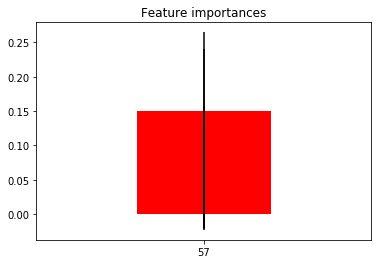

In [25]:
import matplotlib.pyplot as plt
forest = mdl

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()